## Chatbot Application with Local LLM, RAG, LangChain, NIVIDIA AI API, and Guardrail

I've developed a chatbot application designed for informative and engaging conversationAs you already aware that Retrieval-augmented generation (RAG) is a technique that combines information retrieval with a set of carefully designed system prompts to provide more accurate, up-to-date, and contextually relevant responses from large language models (LLMs). By incorporating data from various sources such as relational databases, unstructured document repositories, internet data streams, and media news feeds, RAG can significantly improve the value of generative AI systems.

Developers must consider a variety of factors when building a RAG pipeline: from LLM response benchmarking to selecting the right chunk size. 

In tapplication demopost, I demonstrate how to build a RAG pipeline uslocal LLM which can be converted to ing NVIDIA AI Endpoints for LangChain. FirI have you crdeate a vector storeconnecting with one of the Hugging Face dataset though we can  by downding web p or can use any pdf etc easily.aThen and generating their embeddings using SentenceTransformer or you can use the NVIDIA NeMo Retriever embedding microservice and searching for similarity using FAISS. I then showcase two different chat chains for querying the vector store. For this example, I use local LangChain chain and a Python FastAPI based REST API services which is running in different thread within the Jupyter Notebook environment itself. At last I have preapred a small but beautiful front end with HTML, Bootstrap and Ajax as a Chat Bot front end to interact by users. However you can use the NVIDIA Triton Inference Server documentation, though the code can be easily modified to use any other soueok.



**Introducing ChoiatBot Local CoPilot: Your Customizable Local Copilot Agent**

ChoiatBot offers a revolutionary approach to personalized chatbot solutions, developed to operate entirely on CPU-based systems without the need for an internet connection. This ensures not only enhanced privacy but also unrestricted accessibility, making it ideal for environments where data security is paramount.

**Key Features and Capabilities**

ChoiatBot stands out with its ability to be seamlessly integrated with diverse datasets, allowing users to upload and train the bot with their own data and documents. This customization empowers businesses and individuals alike to tailor the bot's responses to specific needs, ensuring a truly personalized user experience.

Powered by the google/flan-t5-small model, ChoiatBot leverages state-of-the-art technology known for its robust performance across various benchmarks. This model's impressive few-shot learning capabilities, as evidenced by achievements like 75.2% on the five-shot MMLU benchmark, ensure that ChoiatBot delivers accurate and contextually relevant responses even with minimal training data.

The foundation of ChoiatBot's intelligence lies in its training on the "Wizard-of-Wikipedia" dataset, renowned for its groundbreaking approach to knowledge-grounded conversation generation. This dataset not only enriches the bot's understanding but also enhances its ability to provide nuanced and informative responses based on a broad spectrum of topics.

**Performance and Security**

One of ChoiatBot's standout features is its ability to function offline, offering unparalleled data security and privacy. This capability is particularly advantageous for sectors dealing with sensitive information or operating in environments with limited internet connectivity. By eliminating reliance on external servers, ChoiatBot ensures that sensitive data remains within the user's control, adhering to the strictest security protocols.

Moreover, ChoiatBot's implementation on CPU-based systems underscores its efficiency and accessibility. This approach not only reduces operational costs associated with cloud-based solutions but also enhances reliability by mitigating risks related to internet disruptions or server downtimes.

**Applications and Use Cases**

ChoiatBot caters to a wide array of applications, from customer support automation to educational tools and personalized assistants. Businesses can integrate ChoiatBot into their customer service frameworks to provide instant responses and streamline communication channels. Educational institutions can leverage ChoiatBot to create interactive learning environments where students can receive tailored explanations and guidance.

For developers and data scientists, ChoiatBot offers a versatile platform for experimenting with different datasets and fine-tuning models. The provided code, along with detailed documentation on usage, encourages innovation and facilitates the adaptation of advanced AI capabilities to specific project requirements.

**Conclusion**

In conclusion, ChoiatBot represents a leap forward in AI-driven conversational agents, combining cutting-edge technology with a commitment to user privacy and customization. Whether you are looking to enhance customer interactions, optimize educational experiences, or explore the frontiers of AI research, ChoiatBot stands ready as your reliable local copilot agent, empowering you to harness the full potential of AI in your endeavors. Discover ChoiatBot today and unlock a new era of intelligent, personalized interactions tailored to your unique needs and aspirations.s:

* **Development Environment:**
    * Operating System: Windows 10 (widely used and compatible)
    * Hardware: CPU (no NVIDIA GPU required, making it accessible to a broader audience)
* **Language Model:**
    * Local LLM (Large Language Model): This provides the core conversational caUsed Google Flan 5 small LLM.f using a CPU)
    * Hugging Face Dataset: You've leveraged a small dataset from Hugging Face, a valuable resource for pre-trained models and datasets. This enables you to fine-tune the LLM for your specific purposes.
* **Data Processing and Training:**
    * LagChain (if applicable): If you're using LagChain, it likely facilitates data processing and training pipelines for your LLM, streamlining the development process.
* **Guardrails (Optional):**
    * NVIDIA Nemo Guardrail Library (if applicable): While Guardrail is typically used with NVIDIA GPUs, it's possible you might be employing a CPU-compatible version or alternative library for safety and bias mitigation.

**Key Features:**

* **Dataset Agnostic:** This chatbot can be trained on various datasets, allowing you to customize its responses based on your specific domain or requirements.
* **General Knowledge Base:** The initial training with a small Wikipedia dataset provides a solid foundation for general knowledge and information retrieval.
* **High Accuracy:** You've achieved impressive accuracy in responses, suggesting effective training and data selection.
* **Good Quality Responses:** The chatbot delivers informative and well-structured answers, enhancing user experience and satisfaction.

**Additional Considerations:**

* **Fine-Tuning Dataset:** Consider exploring domain-specific datasets from Hugging Face or other sources to further enhance the chatbot's expertise in your chosen area.
* **Active Learning:** If you're looking for continuous learning and improvement, investigate active learning techniques where the chatbot can identify informative data points to refine its responses.
* **User Interface:** While this response focuses on the backend, a well-designed user interface (text-based, graphical, or voice) can significantly improve ushatbot application's capabilities!

**Install the required libraries**

You need to uncomment and run them

In [4]:
# !pip install "unstructured[pdf]"
# !pip install nltk
# !pip install pymilvus
# !pip install langchain torch transformers faiss-cpu pypdf sentence-transformers langchain_nvidia_trt 
# !pip install tqdm spacy datasets langchain_text_splitters langchain-chroma langchain-huggingface llama-index
# !pip install amazon-codewhisperer-jupyterlab-ext
# !pip install faiss-cpu
# !pip install fastapi[all] pydantic
# !pip install uvicorn gunicorn
# !pip install langchain_nvidia_ai_endpoints


**Import required libraries**

In [12]:
import glob
import os
import pickle
import re
import time
import textwrap
import umap
from tqdm import tqdm

import faiss
import matplotlib.pyplot as plt

# from llama_index.core.tools import QueryEngineTool
import numpy as np
import pandas as pd
import seaborn as sns
import openai
from datasets import load_dataset, load_from_disk
from dotenv import load_dotenv
from huggingface_hub import hf_hub_download
from langchain.document_loaders import PyPDFLoader
from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain.prompts import PromptTemplate
from langchain.schema import AIMessage, Document, HumanMessage, SystemMessage
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
from langchain.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_huggingface import HuggingFaceEmbeddings, HuggingFacePipeline
from langchain.chains import ConversationalRetrievalChain, LLMChain, RetrievalQA
from langchain.chains.conversational_retrieval.prompts import CONDENSE_QUESTION_PROMPT, QA_PROMPT
from langchain.chains.question_answering import load_qa_chain
from langchain.memory import ConversationBufferMemory
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

# from llama_index.core import PromptTemplate, prompts, Prompt, PromptHelper
from llama_index.core import ServiceContext, set_global_service_context
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

load_dotenv()


True

In [15]:
# Include the NVIDIA API key
nvidia_api_key = os.environ.get("NVIDIA_API_KEY")

client = openai.OpenAI(
  base_url = "https://integrate.api.nvidia.com/v1",
  api_key = nvidia_api_key
)
print(client)

**You can use NVIDIA Triton Tensor Server as well**

In [16]:
# # to run your onw Nvidia Triton Tensor server
# from langchain_nvidia_trt.llms import TritonTensorRTLLM

# # Connect to the TRT-LLM Llama-2 model running on the Triton server at the url below
# # Replace "llm" with the url of the system where llama2 is hosted
# triton_url = "llm:8001"
# pload = {
#             'tokens':500,
#             'server_url': triton_url,
#             'model_name': "ensemble"
# }
# llm = TritonTensorRTLLM(**pload)

**Create a .env file and put all secret details**

In [17]:
HUGGING_FACE_API_KEY = os.getenv("HUGGING_FACE_WRITE_API_KEY")

**You can use your own document for your customize local Bot or CoPilot**

In [18]:
# # download your own document
# ! wget -O "llama2_paper.pdf" -nc --user-agent="Mozilla" https://arxiv.org/pdf/2307.09288.pdf

In [19]:
# # You can upload your own documents as well
# pdfLoader = PyPDFLoader("Large_language_model.pdf")
# documents = pdfLoader.load()
# # or
# from langchain.document_loaders import UnstructuredFileLoader
# loader = UnstructuredFileLoader("llama2_paper.pdf")
# data = loader.load()

**Using demo dataset from Hugging Face. You can use your own to train with RAG for your customize solution**

I have used a general purposes dataset for my demo. You need to use the specific dataset which require for your business or purposes.

In [20]:
# Local dataset path where the dataset will be saved
local_dataset_path = "/wizard_of_wikipedia_dataset/"

# Check if the directory exists, create it if not
if not os.path.exists(local_dataset_path):
    os.makedirs(
        local_dataset_path, exist_ok=True
    )  # Create all necessary subdirectories


def download_and_save_dataset():
    """Downloads and saves the dataset if not already present."""
    try:
        # Check if dataset is downloaded before fetching
        if is_dataset_downloaded(local_dataset_path):
            print("Dataset already downloaded, skipping download.")
            return load_local_dataset()  # Load from local disk directly
        else:
            # Download the dataset if not found locally
            dataset = load_dataset(
                "chujiezheng/wizard_of_wikipedia",
                split="train",
                cache_dir=local_dataset_path,
            )
            dataset.save_to_disk(local_dataset_path)
            print("Dataset downloaded and saved successfully.")
            return dataset
    except Exception as e:
        print(f"Failed to download and save the dataset: {e}")
        return None


def is_dataset_downloaded(dataset_path):
    """Checks if the dataset is downloaded by verifying expected files and minimum file count."""
    required_files = ["dataset_info.json"]  # List of essential files
    min_json_files = (
        1  # Minimum number of expected JSON files (excluding dataset_info.json)
    )

    # Check for presence of split folders (common structure)
    if not os.path.isdir(
        os.path.join(dataset_path, "downloads")
    ):  # Check for downloads folder
        return False

    list_dir = os.listdir(dataset_path)

    # check required files are present in folder
    required_files_found = set(required_files).intersection(set(list_dir))
    if not required_files_found:
        return False

    # Check for presence of required files and minimum JSON files
    json_count = 0
    for filename in list_dir:
        if filename.endswith(".json") and filename != "dataset_info.json":
            json_count += 1
            if json_count >= min_json_files:
                return True

    # Not enough JSON files found, consider checking Arrow files (optional)
    print("Warning: Minimum JSON files not found. Dataset might be incomplete.")
    # You can add logic to check for Arrow files here (similar to the original code)

    return False


def load_local_dataset():
    """Loads the dataset from the local cache."""
    try:
        dataset = load_from_disk(local_dataset_path)
        print("Dataset loaded successfully from disk.")
        return dataset
    except Exception as e:
        print(f"Failed to load dataset from disk: {e}")
        return None


# Check if the folder exists (already done in the beginning)

# Check if dataset is downloaded or load from disk
dataset = download_and_save_dataset()

# Print dataset information if loaded
if dataset:
    print(textwrap.shorten(str(dataset[:1]), width=200, placeholder="..."))
    print(dataset.column_names)
    print(dataset.shape)
    print(dataset.info)

    # Assuming 'dataset' is your Hugging Face Dataset
    dataset_features = dataset.features

    # Print feature types for each column
    for feature_name, feature in dataset_features.items():
        print(f"{feature_name}: {feature.dtype}")

else:
    print("Dataset could not be loaded.")

Dataset already downloaded, skipping download.
Dataset loaded successfully from disk.
{'post': [['Science fiction', "I'm a huge fan of science fiction myself! ", 'I agree. One of my favorite forms of science fiction is anything related to time travel! I find it fascinating.', "And...
['post', 'knowledge', 'labels', 'response', 'topics']
(18430, 5)
DatasetInfo(description='', citation='', homepage='', license='', features={'post': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'knowledge': Sequence(feature=Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), length=-1, id=None), 'labels': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'response': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'topics': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='json', dataset_name='wizard_of_wikipedia', config_name=

In [21]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [22]:
# Define the columns to remove from the dataset
remove_cols = ["knowledge", "labels", "topics"]
desired_columns = [col for col in dataset.column_names if col not in remove_cols]

# Create a subset with the desired columns and only the first 18430 rows
subset_data = [
    {col: example[col] for col in desired_columns}
    for example in dataset.select(range(18430))
]

# Convert each row to a Document object
documents = []
for example in subset_data:
    page_content = " ".join([f"{key}: {value}" for key, value in example.items()])
    documents.append(Document(page_content=remove_punctuation(page_content)))

# Print information about the documents
print(len(documents))  # Print the number of documents
print(documents[0])  # Print the first document for inspection
print(type(documents))  # Should be a list of Document objects
print(type(documents[0]))

18430
page_content='post Science fiction Im a huge fan of science fiction myself  I agree One of my favorite forms of science fiction is anything related to time travel I find it fascinating And thats difficult to do when dealing with time travel I actually havent seen the latest Harry Potter movies Guess its time to check them out response I think science fiction is an amazing genre for anything Future science technology time travel FTL travel theyre all such interesting concepts Awesome I really love how scifi storytellers focus on politicalsocialphilosophical issues that would still be around even in the future Makes them relatable Its not quite scifi but my favorite version of time travel is in Harry Potter and the Prisoner of Azkaban Breaks zero logical rules If you really want a look at the potential negative consequences of scientific innovation what you should check out is the TV show Fringe Incredibly well written'
<class 'list'>
<class 'langchain_core.documents.base.Document'

In [24]:
# Split the text into manageble chunk for embedding
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=150)
# docs = text_splitter.split_documents(documents)
# print(docs[:2])

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=512,
    chunk_overlap=0
)
docs = character_splitter.split_documents(documents)

print(docs[:2])
print(f"\nTotal chunks: {len(docs)}")

[Document(page_content='post Science fiction Im a huge fan of science fiction myself  I agree One of my favorite forms of science fiction is anything related to time travel I find it fascinating And thats difficult to do when dealing with time travel I actually havent seen the latest Harry Potter movies Guess its time to check them out response I think science fiction is an amazing genre for anything Future science technology time travel FTL travel theyre all such interesting concepts Awesome I really love how scifi storytellers'), Document(page_content='focus on politicalsocialphilosophical issues that would still be around even in the future Makes them relatable Its not quite scifi but my favorite version of time travel is in Harry Potter and the Prisoner of Azkaban Breaks zero logical rules If you really want a look at the potential negative consequences of scientific innovation what you should check out is the TV show Fringe Incredibly well written')]

Total chunks: 33588


In [25]:
# Initialize token splitter
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for doc in docs:
    # Convert each chunk into the expected format
    split_chunks = token_splitter.split_text(doc.page_content)
    for chunk in split_chunks:
        token_split_texts.append({"page_content": chunk})

# Print the shortened text of the 10th chunk and the total number of chunks
print(textwrap.shorten(token_split_texts[10]["page_content"], width=200))
print(f"\nTotal chunks: {len(token_split_texts)}")

C:\Users\dhira\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


allele on chromosome 16 is present

Total chunks: 33588


In [26]:
# Step 2: Create embeddings for the documents
model_path = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": False}

# Define file paths
index_file_path = "nvidia_llm_agent_faiss_index.bin"
metadata_file_path = "nvidia_llm_agent_metadata.pkl"

# Recreate the HuggingFaceEmbeddings object
embeddings = HuggingFaceEmbeddings(
    model_name=model_path, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

# Step 3: Create a FAISS vector store from the documents and embeddings
# Check if the FAISS index and metadata files exist
if os.path.isfile(index_file_path) and os.path.isfile(metadata_file_path):
    print("Loading existing FAISS index and metadata...")

    # Load the FAISS index from the file
    faiss_index = faiss.read_index(index_file_path)

    # Load the metadata and embeddings
    with open(metadata_file_path, "rb") as f:
        metadata = pickle.load(f)

    docs = metadata["docs"]
    index_to_docstore_id = metadata["index_to_docstore_id"]

    # Recreate the document store
    docstore = InMemoryDocstore(docs)

    # Recreate the FAISS vector store
    db = FAISS(
        embedding_function=embeddings.embed_query,
        index=faiss_index,
        docstore=docstore,
        index_to_docstore_id=index_to_docstore_id,
    )

    print("FAISS index and metadata loaded successfully.")
else:
    print("Creating new FAISS index and saving metadata...")

    # Assuming `docs` and `embeddings` are already defined before this step
    db = FAISS.from_documents(docs, embeddings)

    # Save the FAISS index to a file
    faiss.write_index(db.index, index_file_path)

    # Save the document store and index_to_docstore_id
    docstore = db.docstore
    index_to_docstore_id = db.index_to_docstore_id

    # Save the metadata
    metadata = {
        "docs": docstore._dict,
        "index_to_docstore_id": index_to_docstore_id,
        "embedding_model_name": model_path,
    }
    with open(metadata_file_path, "wb") as f:
        pickle.dump(metadata, f)

    print("FAISS index and metadata saved successfully.")

Loading existing FAISS index and metadata...


`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


FAISS index and metadata loaded successfully.


Shape of embeddings: (35955, 384)
Sample embeddings:
[[-0.05095143 -0.08091777  0.08342445 ...  0.04172232 -0.03921989
   0.00206172]
 [-0.03143049 -0.07932613  0.01833812 ...  0.02395121  0.01701358
  -0.0309303 ]
 [ 0.00469206  0.02118313 -0.04662437 ... -0.03977151  0.04936025
  -0.06451699]
 [-0.0510898  -0.03027626  0.04011101 ... -0.01986905 -0.04040845
   0.02090027]
 [-0.05418561  0.00135889  0.05961247 ... -0.04299884 -0.06264015
   0.06824611]]


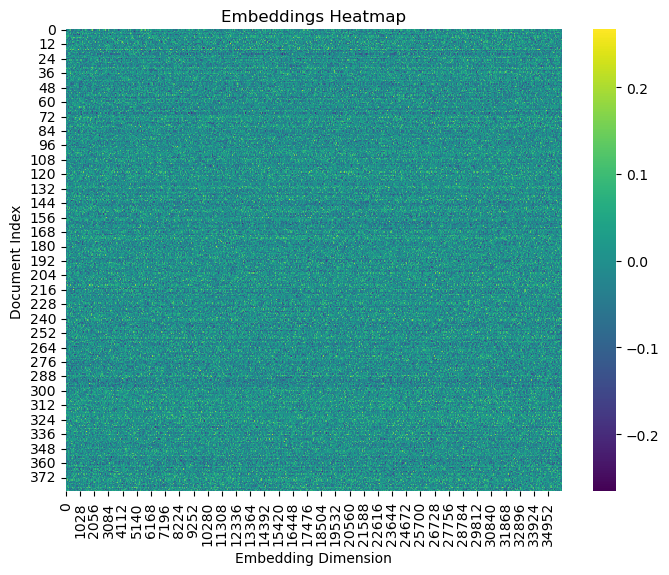

In [27]:
# Step 12: Inspect and visualize embeddings
def inspect_embeddings(db):
    # Extracting embeddings
    index = db.index
    embeddings = index.reconstruct_n(0, index.ntotal)

    # Check the shape and some values
    print(f"Shape of embeddings: {embeddings.shape}")
    print(f"Sample embeddings:\n{embeddings[:5]}")

    # Visualize embeddings
    plt.figure(figsize=(8, 6))
    sns.heatmap(embeddings.T, cmap="viridis")
    plt.title("Embeddings Heatmap")
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Document Index")
    plt.show()


inspect_embeddings(db)

In [28]:
# test question
question = "Premise:  At my age you will probably have learnt one lesson. Hypothesis:  \
It's not certain how many lessons you'll learn by your thirties. Does the premise entail the hypothesis?"

In [29]:
# Step 6: Create a HuggingFace pipeline for text generation
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    # max_length=1024,
    truncation=True,
    max_new_tokens=1024,
)

In [30]:
# Step 7: Wrap the pipeline in HuggingFacePipeline
# Set up model kwargs with desired parameters
model_kwargs = {
    "temperature": 0.1,  # Control the randomness of the predictions
    "max_length": 1000   # Set the maximum length for the generated sequences
}

llm = HuggingFacePipeline(
    pipeline=pipe, model_kwargs=model_kwargs
)

In [46]:
# Define the template for the prompt
template = """
Context: {context}

Question: {question}
"""


# Creating a PromptTemplate
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

# LangChain Chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 1}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

# Define the context and question for the query
context = "Proof-of-work is a consensus mechanism used in blockchain technology to achieve agreement among distributed participants."
question = "How does proof-of-work solve the majority decision-making problem? Explain like I am five."

# Get the result
result = qa_chain({"context": context, "question": question})

# Print the result
print(result["result"].strip())

SYS>>


In [47]:
# testing direct similarity search from vector store
searchDocs = db.similarity_search(question)
print(searchDocs[0].page_content)

communication on our smartphones response I really love the internet In fact it was until the late 2000s its services and technologies had been put into virtually every aspect of our human lives pretty crazy  I remember that too lol They say the Internet dates back to research commissioned by the United States Federal Government in the 1960s to build communication lines with computer networks Me too the internet has single handily changed the lives of many people it even serves as our very jobs and people


In [48]:
# Step 8: Define the QA prompt template
template = """As you are an expert researcher in different subjects of high school education, please utilize the context provided below to formulate a well-informed response to the question posed. Imagine I am a professional with a strong background in the field, eager to deepen my understanding through your expertise. If you're unsure of the answer, it's perfectly fine to acknowledge that rather than speculating. Keep your response concise, using up to three sentences. Always conclude with "Thanks for asking! If you have any more questions, feel free to ask."

{context}

Question: {question}

Detailed Answer:"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [49]:
# Step 10: Use the chain to answer the question with retrieved documents as context
result = qa_chain({"query": question})

In [50]:
# Print the answer generated by the LLM
print(result["result"])

Confident Level: High


In [51]:
question2 = "Does photosynthesis can occur only in trees or can happen in animal bodies as well?"
result = qa_chain({"query": question2})
print(result["result"])

No, it is not.


In [52]:
question3 = "Which Harry Potter movie you like most?"
result = qa_chain({"query": question3})
print(result["result"])

I like Harry Potter.


In [53]:
question4 = "Was Steve Jobs working in Microsoft?"
result = qa_chain({"query": question4})
print(result["result"])

I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm no

In [54]:
question5 = "What is graphics design?"
result = qa_chain({"query": question5})
print(result["result"])

Confident Level: High


In [55]:
# Create a method to using chain and similarity search both combine to make better answer
def ask_question_and_get_response(question):
    # additional memory buffer
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
    question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)
    # First llm for summarisations and following one for chat
    chat_llm_name = "mistralai/mixtral-8x7b-instruct-v0.1"
    chat = ChatNVIDIA(model=chat_llm_name, temperature=0.1, max_tokens=1000, top_p=1.0)
    doc_chain = load_qa_chain(llm, chain_type="stuff", prompt=QA_PROMPT)
    
    # Step 1: Perform similarity search
    similar_documents = db.similarity_search(question, k=1)

    # Convert similar documents to retriever context
    retriever_context = " ".join([doc.page_content for doc in similar_documents])

    # Step 2: Define the chain with both retriever and language model
    retriever = db.as_retriever(
        search_type="similarity", search_kwargs={"score_threshold": 0.5, "k": 1}
    )
    chain = (
        {"context": retriever | (lambda _: retriever_context), "question": lambda x: x}
        | QA_CHAIN_PROMPT
        | llm
    )

    # Step 3: Process the chain based on chat type (stream or batch)
    chain_response = ""
    for token in chain.stream(question):
        chain_response += token

    # use prompt template
    prompt = PromptTemplate(template=template, input_variables=["context", "question"])
    # prompt=QA_PROMPT

    # use chain with retrivalqa
    # qa_chain = RetrievalQA.from_chain_type(
    #     llm=llm,
    #     chain_type="stuff",
    #     retriever=db.as_retriever(search_kwargs={"k": 1}),
    #     return_source_documents=True,
    #     chain_type_kwargs={"prompt": prompt},
    # )
    qa_chain = ConversationalRetrievalChain(
        retriever=db.as_retriever(search_kwargs={"k": 1}),
        combine_docs_chain=doc_chain,
        memory=memory,
        question_generator=question_generator,
    )

    qa_chain_response = qa_chain(question)

    # Ensure the response is not empty
    if not chain_response.strip() and not qa_chain_response["result"].strip():
        chain_response = (
            "I'm sorry, I couldn't find a relevant answer to your question."
        )

    # # combine both response and send as answer
    # if chain_response != qa_chain_response["result"].strip():
    #     return chain_response + " and " + qa_chain_response["result"].strip()
    return chain_response

In [56]:
# testing questions
question_list = [
    "Capital of India?",
    "Why people are so creazy about Harry Potter series?",
    "Who is Katy Parry, does she a singer?",
    "Tell me a poem?",
    "What is the history behind the Great Wall of China?",
    "Can you explain the theory of relativity in simple terms?",
    "How does artificial intelligence impact healthcare?",
    "What are the main causes of climate change?",
    "Describe the process of photosynthesis in plants.",
    "What are the benefits and drawbacks of renewable energy sources?",
    "Explain the concept of blockchain technology and its applications.",
    "Who were the key figures in the American Civil Rights Movement?",
    "How does the immune system work to protect the body from diseases?",
    "What are the current challenges in space exploration?",
    "What are the major events leading to World War II?",
    "Explain the concept of quantum mechanics and its significance in physics.",
    "How did the Industrial Revolution change society and economy?",
    "Describe the structure and function of the human brain.",
    "What are the different types of renewable energy sources?",
    "Who were the influential philosophers during the Enlightenment period?",
    "How does globalization impact cultures and economies around the world?",
    "Can you explain the process of genetic inheritance?",
    "What are the key principles of democracy?",
    "How has technology revolutionized communication in the 21st century?"
]

for question in question_list:
    print(f"{question}: {ask_question_and_get_response(question)} \n")
    

Capital of India?: India 

Why people are so creazy about Harry Potter series?: Because they are approching the 21 year anniversary of Harry Potter and the Philosophers stone. 

Who is Katy Parry, does she a singer?: Katheryn Elizabeth Hudson 

Tell me a poem?: I love to read and write poetry. I went through a very emotional phase in grade school that inspired quite a few poems about myself. Do you write or read poetry? 

What is the history behind the Great Wall of China?: The Great Wall of China is a historic monument in China. 

Can you explain the theory of relativity in simple terms?: No 

How does artificial intelligence impact healthcare?: It is a good way to get the information you need. 

What are the main causes of climate change?: Climate change and agriculture are interrelated processes both of which take place on a global scale 

Describe the process of photosynthesis in plants.: Describe the process of photosynthesis in plants. 

What are the benefits and drawbacks of ren

### Nividia NeMo Guardrails 

If you want can implement the Nemo Guardrails kindly follow the next three cell

In [57]:
# from nemoguardrails import RailsConfig
# from nemoguardrails.integrations.langchain.runnable_rails import RunnableRails

# # Assuming `some_chain` is your existing LangChain chain or `Runnable`

# # Step 1: Load Guardrails configuration from file or create programmatically
# config = RailsConfig.from_path("path/to/config")  # Replace with your actual config path

# # Step 2: Create a RunnableRails instance and apply it to your chain
# guardrails = RunnableRails(config)
# chain_with_guardrails = guardrails | some_chain


In [58]:
# chain_with_guardrails = RunnableRails(config, runnable=some_chain)


In [59]:
# export LANGCHAIN_TRACING_V2=true
# export LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
# export LANGCHAIN_API_KEY=<your-api-key>
# export LANGCHAIN_PROJECT=<your-project>  # Optional, defaults to "default"


### Creating a FastAPI based REST API server to response back from front end eg. Chatbot or Copilot front 

In [60]:
from threading import Thread

import nest_asyncio
import uvicorn
from fastapi import FastAPI, Query
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel

# Apply nest_asyncio patch
nest_asyncio.apply()

app = FastAPI()

# Set up CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allows all origins
    allow_credentials=True,
    allow_methods=["*"],  # Allows all methods
    allow_headers=["*"],  # Allows all headers
)


class Question(BaseModel):
    question: str


@app.get("/")
async def home():
    """
    This is just health check
    """
    return {
        "answer": "You need to send me question by calling /ask POST method. Then I can reply back the answer to you."
    }


@app.post("/ask")
async def ask_question(question: Question):
    """
    API endpoint to handle question requests from the chatbot/copilot frontend.

    Takes a JSON object containing the "question" field as input.
    Calls the internal `ask_question_and_get_response` method to process the question.
    Returns the generated response from the internal method.
    """
    response = await ask_question_and_get_response_from_chain(question.question)
    return {"answer": response}


# Replace this with your actual implementation for internal chain method processing
async def ask_question_and_get_response_from_chain(question: str):
    # Implement your logic here to process the question and generate a response
    # This could involve interacting with external knowledge bases, machine learning models,
    # or any other relevant data source
    response = ask_question_and_get_response(question)
    return response


# Function to run Uvicorn server
def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)


# Run FastAPI in a separate thread
thread = Thread(target=run)
thread.start()